In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
crime = pd.read_csv('Crimes_-_2001_to_Present.csv')
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# rename some columns 
crime = crime.rename(columns={'Case Number': 'Case_num', 'Primary Type': 'Primary_type', 'Location Description': 'Location_desc', 'Community Area': 'Community_Area', 'FBI Code': 'FBI_Code', 'Updated On': 'Updated_On'})
crime.head()


,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [5]:
crime.Primary_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7650199 entries, 0 to 7650198
Series name: Primary_type
Non-Null Count    Dtype 
--------------    ----- 
7650199 non-null  object
dtypes: object(1)
memory usage: 58.4+ MB


In [6]:
#number of null entries per feature
missing_values = list(crime.isna().sum())

cols = list(crime.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # making a dicionary for the missing values

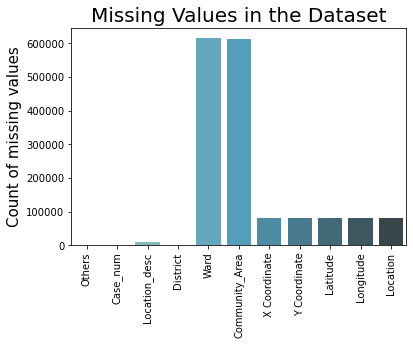

In [7]:
# Plotting the missing values in the dataset
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Missing Values in the Dataset", fontdict = {'fontsize': 20})
plt.ylabel("Count of missing values", fontdict={'fontsize': 15})
plt.show()

#### We can see that all the features that have a large count of missing values are features that relate to the geographical location of the crime scene. The Chicago Crime Dataset is based on first hand accounts of people involved in or around the crime, not necessary that such first hand reports need to contain the specific locations of the crime.

#### Since, these features are not direct numeric values, we can't use summary statistical functions to fill in the missing values. So we will be removing these values from the dataset.

In [8]:
crime = crime.dropna()
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6956012 entries, 0 to 7650198
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   Case_num        object 
 2   Date            object 
 3   Block           object 
 4   IUCR            object 
 5   Primary_type    object 
 6   Description     object 
 7   Location_desc   object 
 8   Arrest          bool   
 9   Domestic        bool   
 10  Beat            int64  
 11  District        float64
 12  Ward            float64
 13  Community_Area  float64
 14  FBI_Code        object 
 15  X Coordinate    float64
 16  Y Coordinate    float64
 17  Year            int64  
 18  Updated_On      object 
 19  Latitude        float64
 20  Longitude       float64
 21  Location        object 
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.1+ GB


Convert date in dataframe 

In [ ]:
# Time Conversion Function
def convert_time(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [ ]:
# apply time function
crime['Date'] = crime['Date'].apply(convert_time)

In [9]:
crime.Date = pd.to_datetime(crime.Date, format = '%m/%d/%Y %I:%M:%S %p')
crime.index = pd.DatetimeIndex(crime.Date)

In [10]:
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
2015-09-05 10:55:00,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


### What are the most common crimes?

In [11]:
count = crime[['Primary_type']]

In [12]:
crime_count = pd.DataFrame(count.groupby('Primary_type').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count.head()

,Primary_type,counts
0,THEFT,1471635
1,BATTERY,1279284
2,CRIMINAL DAMAGE,796892
3,NARCOTICS,666676
4,ASSAULT,455091


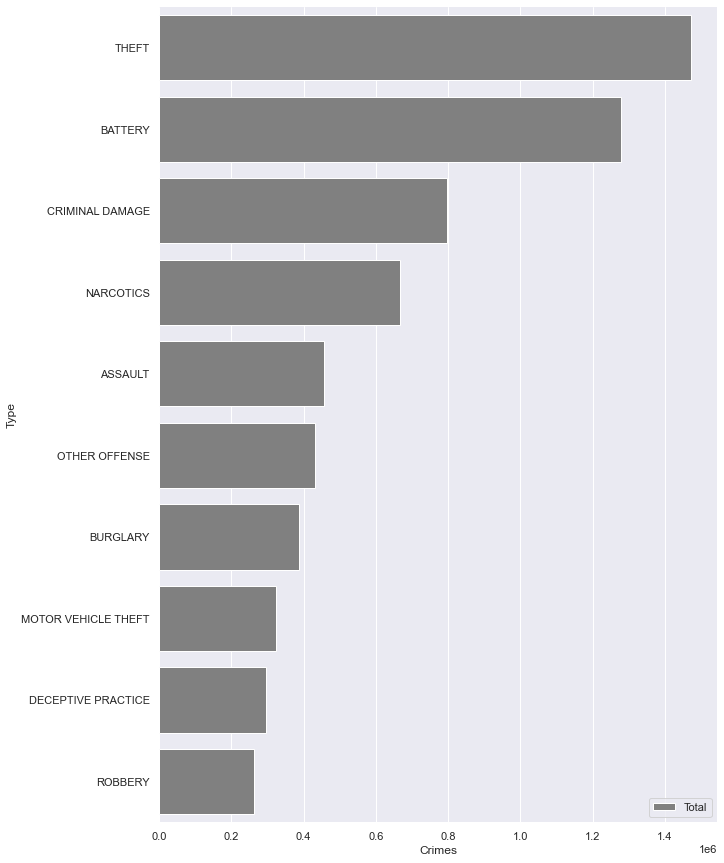

In [13]:
# crime count graph
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(y="Primary_type", x="counts", data=crime_count.iloc[:10, :],label="Total", color="grey")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)
plt.show()

### How many cases of the top crimes end in arrest?

In [14]:
b = pd.DataFrame(crime ,columns=['Primary_type','Arrest'])

In [15]:
domestic_count1 = pd.DataFrame(b.groupby(['Primary_type','Arrest']).size().sort_values(ascending=False).rename('counts').reset_index())
domestic_count1


,Primary_type,Arrest,counts
0,THEFT,False,1309511
1,BATTERY,False,996613
2,CRIMINAL DAMAGE,False,743782
3,NARCOTICS,True,662613
4,BURGLARY,False,364604
...,...,...,...
65,NON-CRIMINAL (SUBJECT SPECIFIED),False,6
66,NON - CRIMINAL,True,6
67,NON-CRIMINAL (SUBJECT SPECIFIED),True,3
68,RITUALISM,True,2


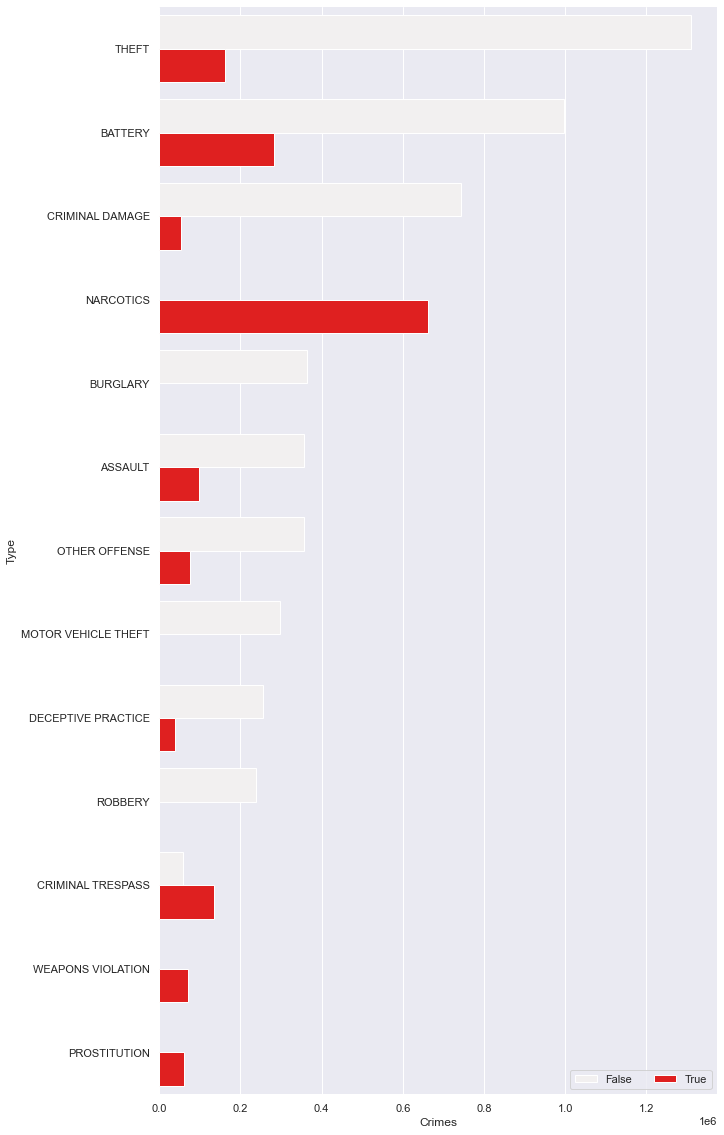

In [16]:
# bar chart to show arrest for crimes 
f, ax = plt.subplots(figsize=(10,20))

# Plot the total crashes
sns.set_color_codes("deep")
sns.barplot( y="Primary_type",x="counts" , data=domestic_count1.iloc[:20, :], hue='Arrest', color='red')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)

### how often do domestic cases end in an arrest?

There are a total of 7,650,199 domestic cases in this dataset, out of all of those 199,064 end in an arrest

In [17]:
# make boolean column if domestic case results in arrest 
crime['domestic_arrest'] = (crime['Domestic']== True) & (crime['Arrest']== True)
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False
2015-09-05 10:55:00,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",False


In [18]:
crime.domestic_arrest.value_counts()

False    6772705
True      183307
Name: domestic_arrest, dtype: int64

narcotics have 744,216 and out of those 739,782 arrests 

In [19]:
crime['narco_arrest'] = np.where((crime['Primary_type'] == 'NARCOTICS') & (
    crime['Arrest'] == True), 1, 0)

In [20]:
crime.narco_arrest.value_counts()

0    6293399
1     662613
Name: narco_arrest, dtype: int64

How many beats per community area?

In [21]:
crime.Beat.nunique()

303

In [22]:
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False,0
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False,0
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False,1
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False,0
2015-09-05 10:55:00,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",False,0


In [23]:
crime.isnull().sum()

ID                 0
Case_num           0
Date               0
Block              0
IUCR               0
Primary_type       0
Description        0
Location_desc      0
Arrest             0
Domestic           0
Beat               0
District           0
Ward               0
Community_Area     0
FBI_Code           0
X Coordinate       0
Y Coordinate       0
Year               0
Updated_On         0
Latitude           0
Longitude          0
Location           0
domestic_arrest    0
narco_arrest       0
dtype: int64

### How often do Crimes occur?

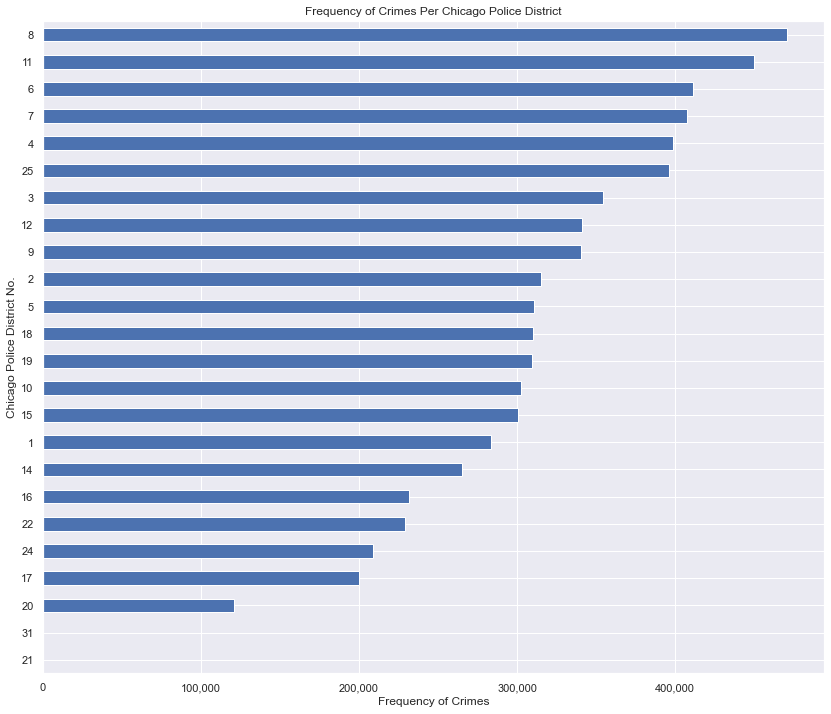

In [24]:
# calculating total number of incidents per district
district_crime = crime['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

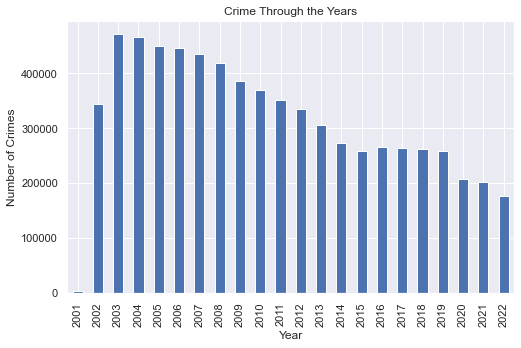

In [25]:
plt.figure(figsize = (8,5))
crime.groupby([crime.index.year]).size().plot.bar()
plt.title('Crime Through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

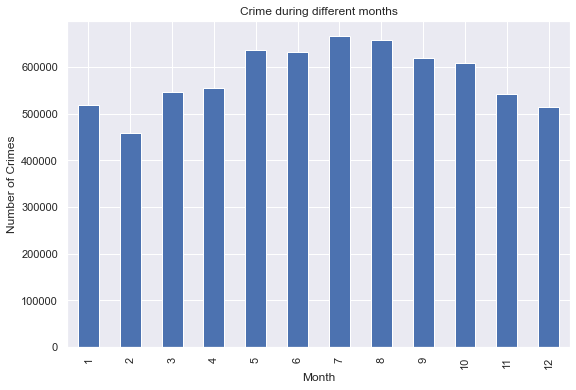

In [26]:
plt.figure(figsize = (9,6))
crime.groupby([crime.index.month]).size().plot.bar()
plt.title('Crime during different months')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

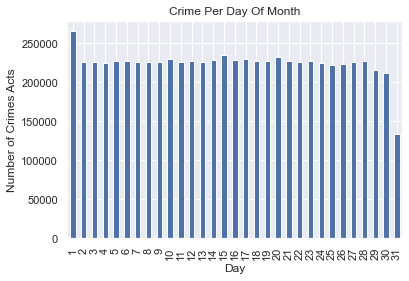

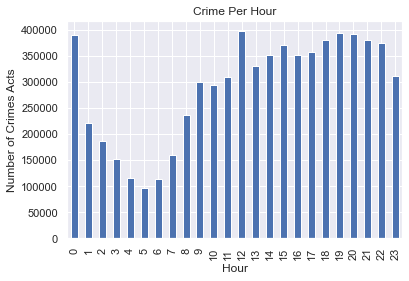

In [27]:
crime.groupby([crime.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

crime.groupby([crime.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [28]:
crime_2012 = crime.loc['2012']
crime_2013 = crime.loc['2013']
crime_2014 = crime.loc['2014']
crime_2015 = crime.loc['2015']
crime_2016 = crime.loc['2016']
crime_2017 = crime.loc['2017']
crime_2018 = crime.loc['2018']
crime_2019 = crime.loc['2019']
crime_2020 = crime.loc['2020']
crime_2021 = crime.loc['2021']
crime_2022 = crime.loc['2022']
arrest_yearly = crime[crime['Arrest'] == True]['Arrest']

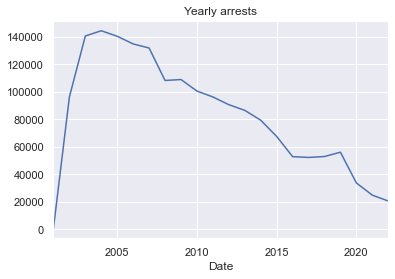

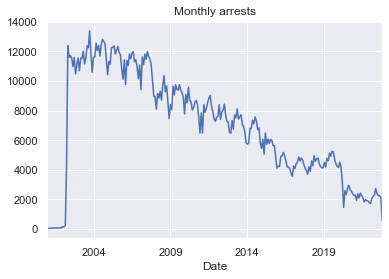

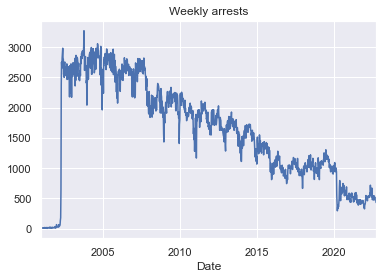

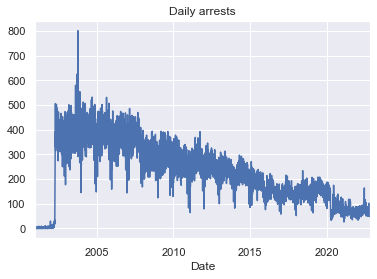

In [30]:
plt.subplot()

# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()

# monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

# weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

You can see a dip in crimes for 2020 when covid started and a spike in crimes on a certain day in 2003. 

In [31]:
# daily arrest
arrest_yearly.resample('D').sum().nlargest(10)

Date
2003-10-16    801
2003-10-17    736
2003-09-23    625
2003-08-21    580
2003-10-02    565
2003-11-30    554
2003-08-29    550
2003-09-06    549
2004-09-16    532
2005-08-25    531
Name: Arrest, dtype: int64

In [32]:
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False,0
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False,0
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False,1
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False,0
2015-09-05 10:55:00,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",False,0


In [33]:
# look at the date of the spikes 
df2 = crime.loc['2003-10-16':'2003-10-17']
df2.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-16 01:30:00,2993866,HJ696108,2003-10-16 01:30:00,045XX S UNION AVE,2830,OTHER OFFENSE,OBSCENE TELEPHONE CALLS,APARTMENT,False,False,935,9.0,11.0,61.0,17,1172391.0,1874768.0,2003,02/10/2018 03:50:01 PM,41.811806,-87.643194,"(41.811806184, -87.643193608)",False,0
2003-10-16 00:46:00,2993881,HJ696099,2003-10-16 00:46:00,064XX N CLARK ST,1025,ARSON,AGGRAVATED,POLICE FACILITY/VEH PARKING LOT,False,False,2432,24.0,40.0,1.0,09,1164254.0,1943116.0,2003,02/28/2018 03:56:25 PM,41.999533,-87.671104,"(41.999533347, -87.671104423)",False,0
2003-10-16 02:09:00,2993884,HJ696088,2003-10-16 02:09:00,0000X W GOETHE ST,2820,OTHER OFFENSE,TELEPHONE THREAT,OTHER,False,False,1824,18.0,42.0,8.0,26,1175560.0,1909045.0,2003,02/28/2018 03:56:25 PM,41.905794,-87.630541,"(41.90579423, -87.630540772)",False,0
2003-10-16 00:06:56,2993892,HJ695962,2003-10-16 00:06:56,009XX W WAVELAND AVE,0460,BATTERY,SIMPLE,SIDEWALK,True,False,2324,19.0,44.0,6.0,08B,1169143.0,1924759.0,2003,02/10/2018 03:50:01 PM,41.949056,-87.653655,"(41.949056076, -87.653654947)",False,0
2003-10-16 00:11:00,2993896,HJ695979,2003-10-16 00:11:00,037XX N HALSTED ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,2324,19.0,46.0,6.0,08B,1170260.0,1924854.0,2003,02/10/2018 03:50:01 PM,41.949292,-87.649546,"(41.949292379, -87.649546279)",False,0


In [34]:
df2.Primary_type.value_counts()

NARCOTICS                           1085
THEFT                                608
BATTERY                              471
CRIMINAL DAMAGE                      313
ASSAULT                              160
BURGLARY                             151
OTHER OFFENSE                        150
ROBBERY                              115
MOTOR VEHICLE THEFT                  107
DECEPTIVE PRACTICE                    87
CRIMINAL TRESPASS                     70
PROSTITUTION                          36
WEAPONS VIOLATION                     22
PUBLIC PEACE VIOLATION                14
SEX OFFENSE                           12
LIQUOR LAW VIOLATION                  10
OFFENSE INVOLVING CHILDREN            10
CRIM SEXUAL ASSAULT                    7
ARSON                                  6
HOMICIDE                               5
INTIMIDATION                           3
INTERFERENCE WITH PUBLIC OFFICER       2
STALKING                               2
KIDNAPPING                             1
GAMBLING        

In [35]:
# look at the date of the spikes 
df3 = crime.loc['2003-10-16']
df3.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-16 01:30:00,2993866,HJ696108,2003-10-16 01:30:00,045XX S UNION AVE,2830,OTHER OFFENSE,OBSCENE TELEPHONE CALLS,APARTMENT,False,False,935,9.0,11.0,61.0,17,1172391.0,1874768.0,2003,02/10/2018 03:50:01 PM,41.811806,-87.643194,"(41.811806184, -87.643193608)",False,0
2003-10-16 00:46:00,2993881,HJ696099,2003-10-16 00:46:00,064XX N CLARK ST,1025,ARSON,AGGRAVATED,POLICE FACILITY/VEH PARKING LOT,False,False,2432,24.0,40.0,1.0,09,1164254.0,1943116.0,2003,02/28/2018 03:56:25 PM,41.999533,-87.671104,"(41.999533347, -87.671104423)",False,0
2003-10-16 02:09:00,2993884,HJ696088,2003-10-16 02:09:00,0000X W GOETHE ST,2820,OTHER OFFENSE,TELEPHONE THREAT,OTHER,False,False,1824,18.0,42.0,8.0,26,1175560.0,1909045.0,2003,02/28/2018 03:56:25 PM,41.905794,-87.630541,"(41.90579423, -87.630540772)",False,0
2003-10-16 00:06:56,2993892,HJ695962,2003-10-16 00:06:56,009XX W WAVELAND AVE,0460,BATTERY,SIMPLE,SIDEWALK,True,False,2324,19.0,44.0,6.0,08B,1169143.0,1924759.0,2003,02/10/2018 03:50:01 PM,41.949056,-87.653655,"(41.949056076, -87.653654947)",False,0
2003-10-16 00:11:00,2993896,HJ695979,2003-10-16 00:11:00,037XX N HALSTED ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,2324,19.0,46.0,6.0,08B,1170260.0,1924854.0,2003,02/10/2018 03:50:01 PM,41.949292,-87.649546,"(41.949292379, -87.649546279)",False,0


In [36]:
df3.Primary_type.value_counts()

NARCOTICS                           559
THEFT                               289
BATTERY                             261
CRIMINAL DAMAGE                     135
OTHER OFFENSE                        83
BURGLARY                             68
ASSAULT                              67
ROBBERY                              55
MOTOR VEHICLE THEFT                  45
DECEPTIVE PRACTICE                   41
CRIMINAL TRESPASS                    35
PROSTITUTION                         18
WEAPONS VIOLATION                     8
SEX OFFENSE                           7
LIQUOR LAW VIOLATION                  6
PUBLIC PEACE VIOLATION                6
OFFENSE INVOLVING CHILDREN            5
CRIM SEXUAL ASSAULT                   3
STALKING                              2
ARSON                                 2
INTERFERENCE WITH PUBLIC OFFICER      1
KIDNAPPING                            1
INTIMIDATION                          1
Name: Primary_type, dtype: int64

In [37]:
df4 = crime.loc['2003-10-17']
df4.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-17 01:00:00,2995826,HJ698578,2003-10-17 01:00:00,045XX N ELSTON AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1722,17.0,39.0,14.0,07,1147132.0,1930108.0,2003,02/10/2018 03:50:01 PM,41.964185,-87.734427,"(41.964184623, -87.734426806)",False,0
2003-10-17 04:25:00,2995839,HJ698624,2003-10-17 04:25:00,0000X E WACKER DR,0890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,06,1176956.0,1902517.0,2003,02/28/2018 03:56:25 PM,41.887850,-87.625611,"(41.887849586, -87.625610638)",False,0
2003-10-17 03:30:00,2995848,HJ698599,2003-10-17 03:30:00,054XX N EAST RIVER RD,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,1614,16.0,41.0,76.0,26,1116632.0,1934981.0,2003,02/10/2018 03:50:01 PM,41.978087,-87.846467,"(41.978086971, -87.846467142)",False,0
2003-10-17 02:30:00,2995888,HJ698585,2003-10-17 02:30:00,0000X S HALSTED ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1212,12.0,27.0,28.0,03,1171056.0,1900139.0,2003,02/10/2018 03:50:01 PM,41.881456,-87.647347,"(41.88145568, -87.647346976)",False,0
2003-10-17 03:30:00,2995903,HJ698623,2003-10-17 03:30:00,007XX W MONTROSE AVE,0460,BATTERY,SIMPLE,GOVERNMENT BUILDING/PROPERTY,False,False,2313,19.0,46.0,3.0,08B,1170442.0,1929436.0,2003,02/28/2018 03:56:25 PM,41.961862,-87.648743,"(41.961861554, -87.648742732)",False,0


In [ ]:
df4.Primary_type.value_counts()

### percentage of arrests 

In [38]:
# Convert values into percentages
arrest_df = crime['Arrest'].value_counts()
arrest_percent = (arrest_df / crime['Arrest'].sum()) * 100 

arrest_percent.rename("% of Arrests",inplace=True)

#Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

<AxesSubplot:ylabel='% of Arrests'>

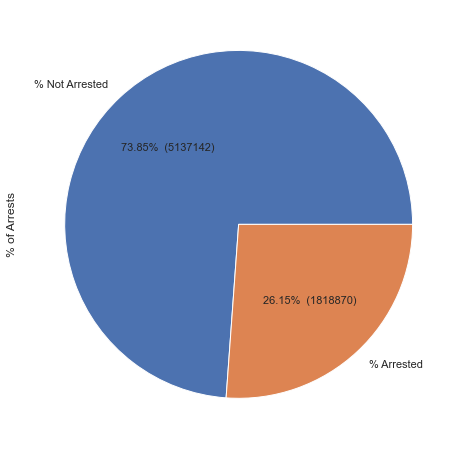

In [39]:
#pie chart to show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(crime['Arrest'].value_counts()),
                       figsize=(8, 8))


In [40]:
## Group dataset by year and arrests
arrest_per_year = crime.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,3165,81.404321
2001,True,723,18.595679
2002,False,248854,72.126159
2002,True,96172,27.873841
2003,False,331554,70.245236
2003,True,140441,29.754764
2004,False,322890,69.121790
2004,True,144242,30.878210
2005,False,309645,68.830190


In [41]:
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False,0
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False,0
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False,1
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False,0
2015-09-05 10:55:00,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",False,0


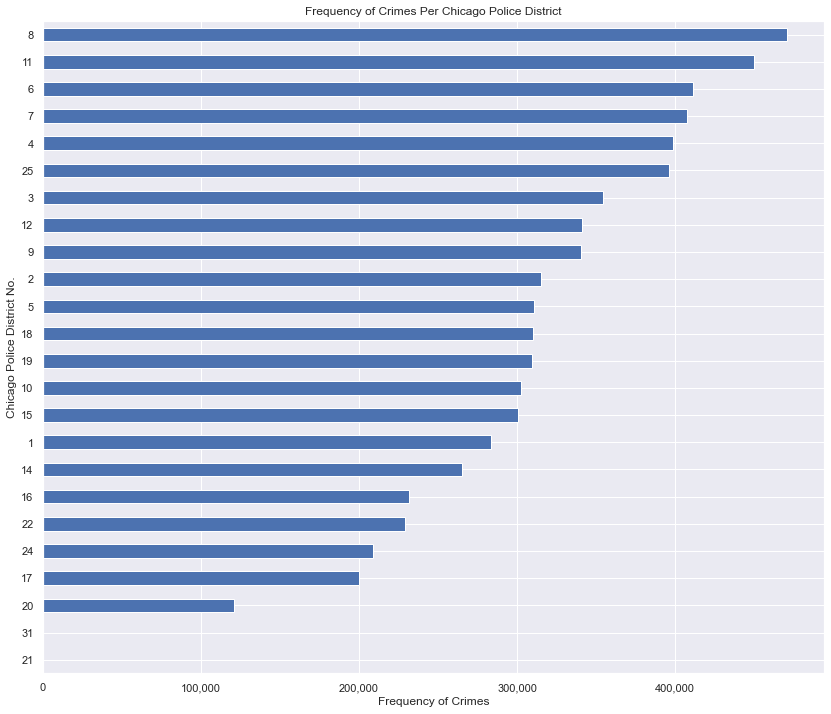

In [42]:
# calculating total number of incidents per district
district_crime = crime['District'].value_counts(ascending=True)

district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

# Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [43]:
crime.head(2)

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.6700,"(41.815117282, -87.669999562)",False,0
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.7654,"(41.895080471, -87.765400451)",False,0


In [44]:
# creat a month column
def month(x):
    return x.strftime("%B")
crime['Month'] = crime['Date'].apply(month)

In [45]:
crime.Primary_type.value_counts()

THEFT                                1471635
BATTERY                              1279284
CRIMINAL DAMAGE                       796892
NARCOTICS                             666676
ASSAULT                               455091
OTHER OFFENSE                         432739
BURGLARY                              386438
MOTOR VEHICLE THEFT                   322815
DECEPTIVE PRACTICE                    294886
ROBBERY                               262951
CRIMINAL TRESPASS                     193612
WEAPONS VIOLATION                      96244
PROSTITUTION                           61218
OFFENSE INVOLVING CHILDREN             48492
PUBLIC PEACE VIOLATION                 48312
SEX OFFENSE                            25726
CRIM SEXUAL ASSAULT                    24191
INTERFERENCE WITH PUBLIC OFFICER       17564
GAMBLING                               13403
LIQUOR LAW VIOLATION                   12686
HOMICIDE                               11832
ARSON                                  11642
KIDNAPPING

In [46]:
# crime['Arrest'].head()
l = crime["Arrest"].value_counts()
false = l[0]
true = l[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(l)})
print("Percentage of no arrests of all reported crimes :",false/(false+true)*100,'!')

Percentage of no arrests of all reported crimes : 73.85182774267784 !


there is a 73% chance of no arrests for a crime 

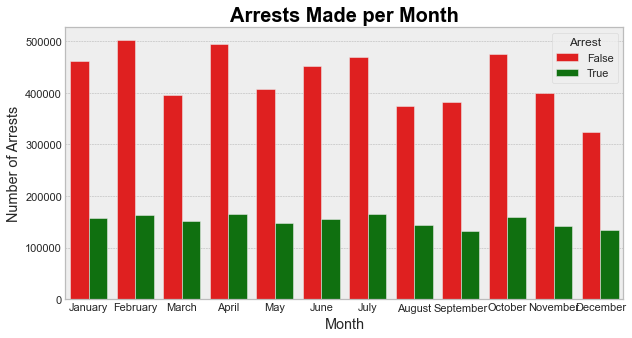

In [47]:
# arrests across the months
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=crime[['Month','Arrest']],
                   palette=['Red', 'Green'])
months = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    

ax.set(title='Arrests Made per Month', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.show()

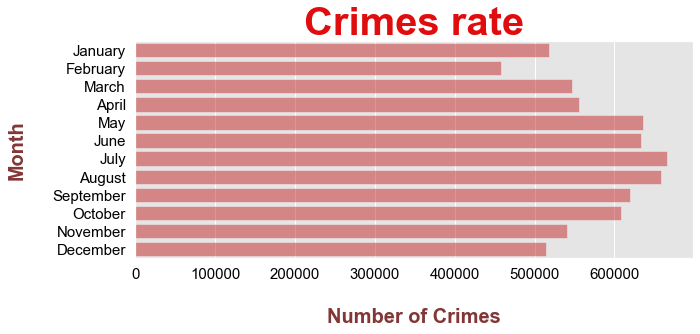

In [63]:
# Set plot style
plt.style.use('ggplot')
sns.set_context('notebook')

# Code to plot
plt.figure(figsize= [10, 4])
sns.countplot(y='Month', data=crime, palette=["#DF0D0D"], order=['January', 'February', 'March', 'April', 'May', 'June', "July", 'August', 'September', 'October', 'November', 'December'], alpha=0.5)

# Aesthetic appeal of the plot 
plt.title("Crimes rate", fontdict={'fontsize': 40, 'color': '#DF0D0D'}, weight="bold")
plt.ylabel("Month\n", fontdict={'fontsize': 20}, weight="bold", color="#833636")
plt.xlabel("\nNumber of Crimes", fontdict={'fontsize': 20}, weight="bold", color="#833636")

plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15, color='black')
plt.show()

crimes rise during the summer months 

now lets create an 'hour' column

In [49]:
def hour(x):
    return x.strftime("%H")
crime['Hour_Day'] = crime['Date'].apply(hour)

In [50]:
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest,Month,Hour_Day
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False,0,September,13
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False,0,September,11
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False,1,September,12
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False,0,September,13
2015-09-05 10:55:00,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",False,0,September,10


In [ ]:
order=crime['Hour_Day'].value_counts().index

In [ ]:
crime['Hour_Day'] = crime['Hour_Day'].astype(str)

In [69]:
crime.Hour_Day.value_counts().sort_index().index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'], dtype='object')

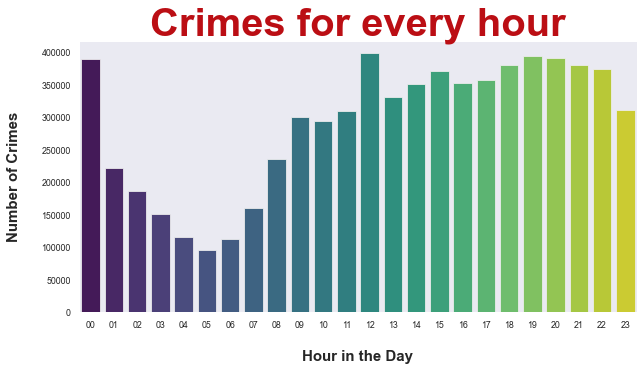

In [70]:
# Set plot style
plt.style.use('seaborn-dark')
sns.set_context('paper')

# code to plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Hour_Day', data=crime, order=crime.Hour_Day.value_counts().sort_index().index, palette="viridis")

# Aesthetics
plt.title("Crimes for every hour", fontdict={'fontsize': 40, 'color': '#bb0e14'}, weight="bold")
plt.xlabel("\nHour in the Day", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")

plt.show()

### splitting data

I am going to split the data so that the train set is the start of the pandemic.

In [ ]:
# human based split 

train = crime[:'2016'] # includes 2016
test = crime['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

In [76]:
crime=crime.sort_index()

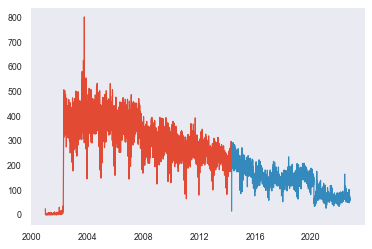

In [78]:
train_size = .70
n = crime.shape[0]
test_start_index = round(train_size * n)

train = crime[:test_start_index] # everything up (not including) to the test_start_index
test = crime[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.resample("D").sum().Arrest)
plt.plot(test.resample("D").sum().Arrest)

In [79]:
train.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest,Month,Hour_Day
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,4835774,HM440784,2001-01-01,022XX W 80TH ST,0842,THEFT,AGG: FINANCIAL ID THEFT,OTHER,False,False,835,8.0,18.0,70.0,06,1162750.0,1851604.0,2001,07/10/2006 03:52:16 AM,41.748448,-87.679203,"(41.748448075, -87.679202816)",False,0,January,00
2001-01-01,3567929,HK655695,2001-01-01,023XX S SAWYER AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1024,10.0,24.0,30.0,06,1155111.0,1887951.0,2001,03/31/2006 10:03:38 PM,41.848345,-87.706223,"(41.848345304, -87.706223356)",False,0,January,00
2001-01-01,3164436,HK164212,2001-01-01,042XX W CONGRESS PKWY,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1132,11.0,24.0,26.0,06,1147877.0,1897385.0,2001,03/31/2006 10:03:38 PM,41.874375,-87.732531,"(41.874375259, -87.732530526)",False,0,January,00
2001-01-01,3661792,HK760148,2001-01-01,054XX S DREXEL AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2131,2.0,5.0,41.0,06,1183119.0,1869343.0,2001,03/31/2006 10:03:38 PM,41.796676,-87.604013,"(41.796676399, -87.604012947)",False,0,January,00
2001-01-01,4421965,HL717150,2001-01-01,056XX S WOLCOTT AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,715,7.0,15.0,67.0,06,1164699.0,1866938.0,2001,03/31/2006 10:03:38 PM,41.790486,-87.671629,"(41.790485769, -87.671628682)",False,0,January,00
